In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns  # For enhanced visualization

In [152]:
data= pd.read_csv('pendulum_data.csv')

In [153]:
data

,theta,theta_dot,theta_double_dot
0,0.040431,-0.069829,0.029322
1,-0.151797,-0.662335,0.138360
2,-0.584669,0.797156,0.446742
3,-0.151016,-0.772319,0.016372
4,0.256469,0.188715,-0.298235
...,...,...,...
995,-0.406553,0.367425,0.369823
996,0.058292,-0.137930,-0.048264
997,-0.006571,0.127600,-0.021672
998,0.277242,0.196108,-0.302841


**Part (a)  Calculate correlation matrix, scatter plots and any other related metrics to qualitatively propose
possible hypotheses and create the hypotheses space.**

**Correlation matrix**

In [154]:
data.corr()

,theta,theta_dot,theta_double_dot
theta,1.000000,-0.045452,-0.940972
theta_dot,-0.045452,1.000000,0.061377
theta_double_dot,-0.940972,0.061377,1.000000


In [155]:
data['sin_theta']= np.sin(data['theta'])

In [156]:
data['theta_dot_sqr'] = data['theta_dot']**2

In [157]:
data

,theta,theta_dot,theta_double_dot,sin_theta,theta_dot_sqr
0,0.040431,-0.069829,0.029322,0.040420,0.004876
1,-0.151797,-0.662335,0.138360,-0.151214,0.438688
2,-0.584669,0.797156,0.446742,-0.551923,0.635458
3,-0.151016,-0.772319,0.016372,-0.150442,0.596477
4,0.256469,0.188715,-0.298235,0.253667,0.035613
...,...,...,...,...,...
995,-0.406553,0.367425,0.369823,-0.395446,0.135001
996,0.058292,-0.137930,-0.048264,0.058259,0.019025
997,-0.006571,0.127600,-0.021672,-0.006571,0.016282
998,0.277242,0.196108,-0.302841,0.273704,0.038458


In [158]:
# Calculate the correlation matrix
data.corr()


,theta,theta_dot,theta_double_dot,sin_theta,theta_dot_sqr
theta,1.000000,-0.045452,-0.940972,0.998554,-0.006074
theta_dot,-0.045452,1.000000,0.061377,-0.046386,0.048752
theta_double_dot,-0.940972,0.061377,1.000000,-0.940533,-0.005858
sin_theta,0.998554,-0.046386,-0.940533,1.000000,-0.005369
theta_dot_sqr,-0.006074,0.048752,-0.005858,-0.005369,1.000000


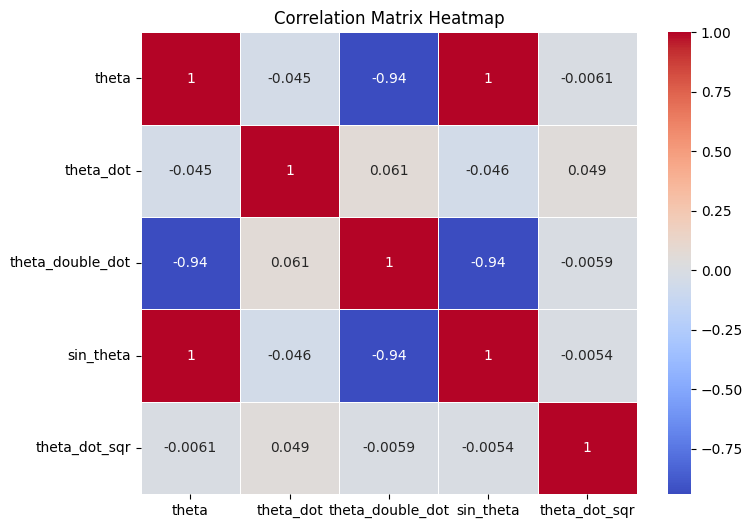

In [159]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observation:**

Close correlation(=1) between sin(theta) and theta (which is obvious as sin(theta) is formed from theta as input). Also we know that for small angles both are almost equal.

Also theta and theta_double_dot have a strong negative correlation(almost -1) which implies when theta increases theta_double_dot decreases.

Also sin(theta) and theta_double_dot have a strong negative correlation(almost -1, and which is obvious as for  small angles both are almost equal.
) which implies when sin(theta) increases theta_double_dot decreases.

**Scatter Plots**

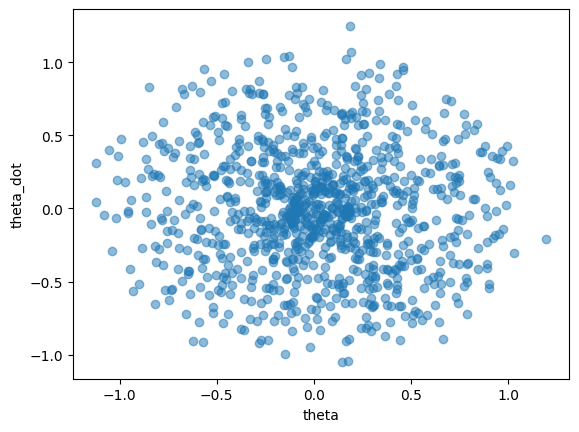

In [160]:
plt.scatter(data['theta'], data['theta_dot'], alpha=0.5)
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.show()


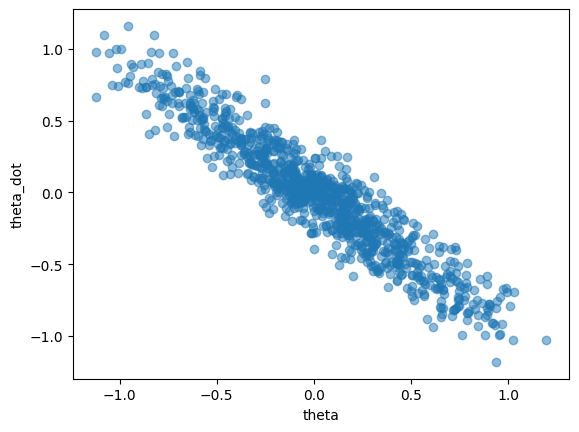

In [161]:
plt.scatter(data['theta'], data['theta_double_dot'], alpha=0.5)
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.show()


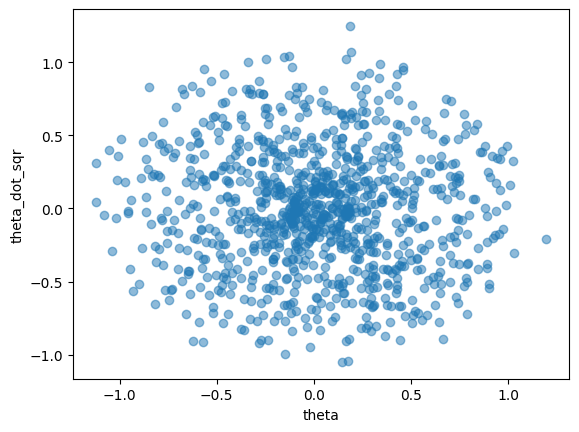

In [162]:
plt.scatter(data['theta'], data['theta_dot'], alpha=0.5)
plt.xlabel('theta')
plt.ylabel('theta_dot_sqr')
plt.show()


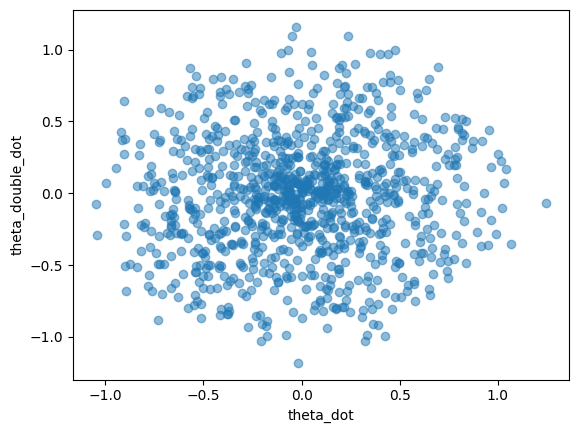

In [163]:
plt.scatter(data['theta_dot'], data['theta_double_dot'], alpha=0.5)
plt.xlabel('theta_dot')
plt.ylabel('theta_double_dot')
plt.show()

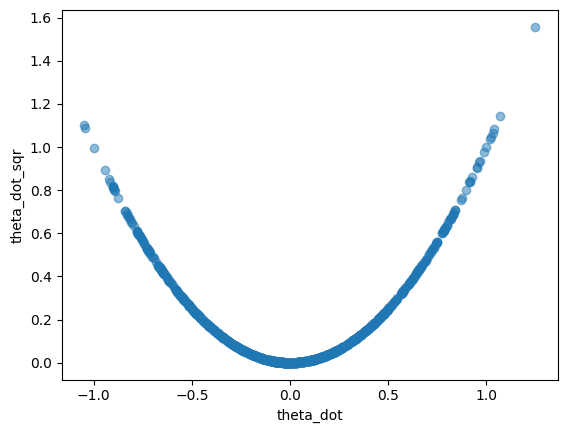

In [164]:
plt.scatter(data['theta_dot'], data['theta_dot_sqr'], alpha=0.5)
plt.xlabel('theta_dot')
plt.ylabel('theta_dot_sqr')
plt.show()

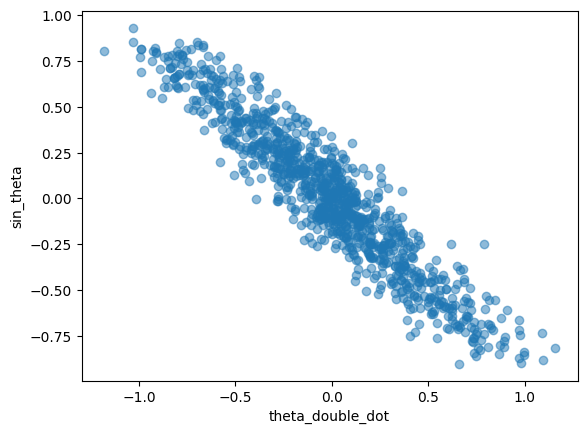

In [165]:
plt.scatter(data['theta_double_dot'], data['sin_theta'], alpha=0.5)
plt.xlabel('theta_double_dot')
plt.ylabel('sin_theta')
plt.show()

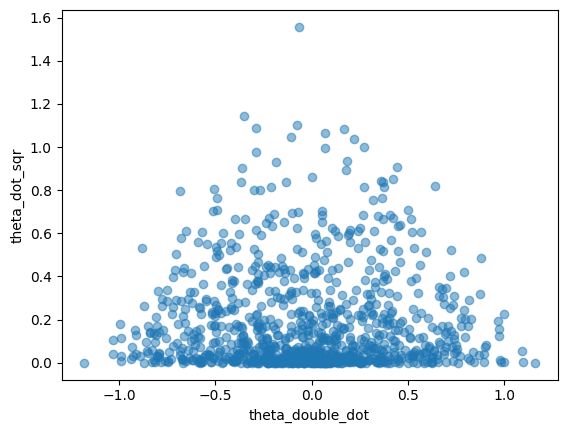

In [166]:
plt.scatter(data['theta_double_dot'], data['theta_dot_sqr'], alpha=0.5)
plt.xlabel('theta_double_dot')
plt.ylabel('theta_dot_sqr')
plt.show()

(b) Using linear or nonlinear regression with ridge regularization find appropriate parameters.

At first just trying with normal **Linear regression**

In [167]:
X = data[['theta', 'theta_dot', 'theta_dot_sqr', 'sin_theta']]
y = data['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
X = data[['theta', 'theta_dot',  'sin_theta','theta_dot_sqr']]
y = data['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression().fit(X_train, y_train)



y_pred = model.predict(X_test)



In [170]:
print("LinearRegression train score: ", model.score(X_train, y_train))

print("LinearRegression test score: ", model.score(X_test, y_test))

print("LinearRegression Mean Squared Error: ", mean_squared_error(y_test, y_pred))

LinearRegression train score:  0.8885431789564399
LinearRegression test score:  0.8784937126379706
LinearRegression Mean Squared Error:  0.0212211548552198


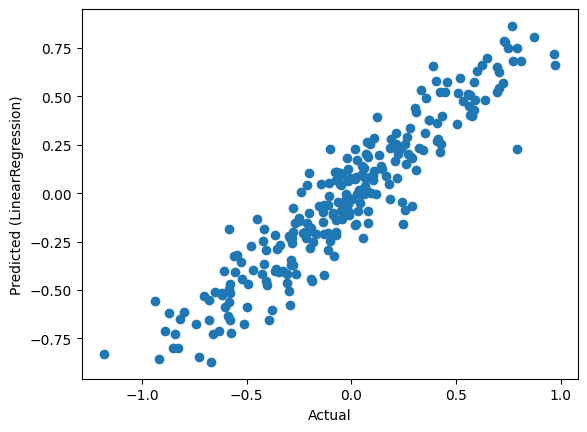

In [171]:
#plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted (LinearRegression)')
plt.show()

Ridge regularization

In [172]:
# Split the data into training and testing sets
X = data[['theta', 'theta_dot', 'theta_dot_sqr', 'sin_theta']]
y = data['theta_double_dot']

In [173]:
from sklearn.pipeline import make_pipeline

In [174]:
from sklearn.pipeline import Pipeline

Ridge train score: 0.8832787192050885
Ridge test score: 0.8935302657547525
Mean Squared Error: 0.018599770958724962
Model Coefficients: [ 0.         -0.49813955  0.00933759 -0.01792471 -0.44352728 -0.01665103
 -0.01152099  0.01275197  0.01067503 -0.01792471  0.03014035  0.0183425
  0.03738227  0.00737372  0.03087359]


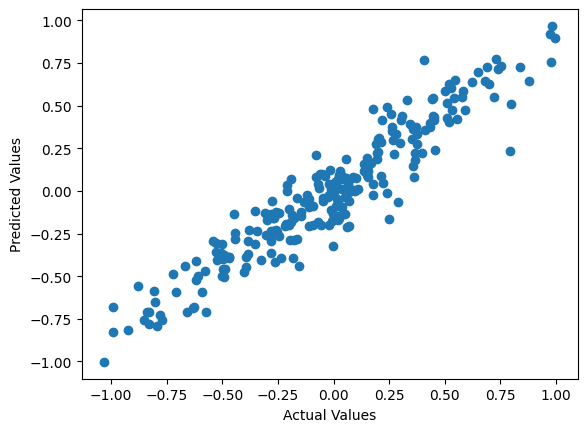

In [175]:


# Define the features and target
X = data[['theta', 'theta_dot', 'theta_dot_sqr', 'sin_theta']]
y = data['theta_double_dot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# Create a pipeline for Polynomial Regression with Ridge regularization
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))  # You can adjust the regularization strength (alpha) as needed
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
coefficients = model.named_steps['ridge'].coef_

# Print results
print("Ridge train score:", train_score)
print("Ridge test score:", test_score)
print("Mean Squared Error:", mse)
print(f"Model Coefficients: {coefficients}")

# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Part (c) Cross validation

In [177]:
# Cross Validation for linear regression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88389061 0.88298176 0.89153785 0.88929951 0.87500287]
Cross Validation Mean Score:  0.8845425220264296


In [178]:
# Cross Validation with ridge regularization
ridge = Ridge(alpha=1)

scores = cross_val_score(ridge, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88382071 0.88297422 0.89163215 0.88951753 0.87500272]
Cross Validation Mean Score:  0.884589465608487


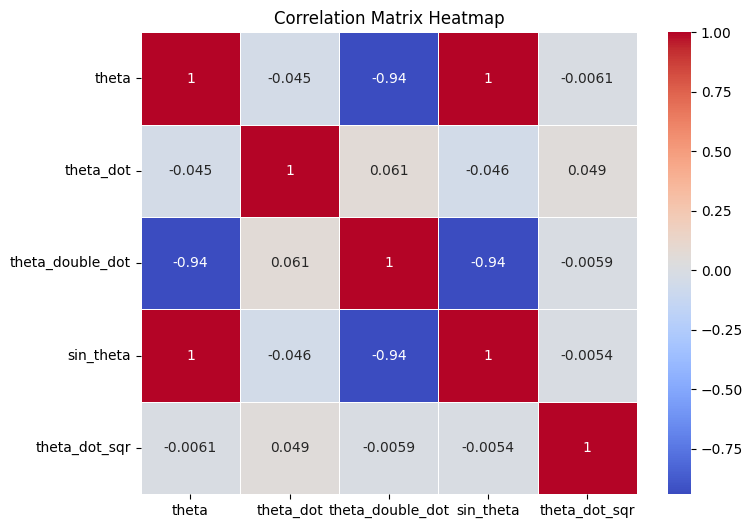

In [179]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

theta and theta_double_dot have a strong negative correlation(almost -1) which implies when theta increases theta_double_dot decreases.The negative correlation coefficient of -0.94 suggests that there is an inverse (negative) relationship between the angular displacement (theta) and angular acceleration (theta_double_dot). Specifically, as the angular displacement increases (the pendulum swings farther from the vertical position), the angular acceleration tends to decrease (the pendulum slows down).

**Hypothesis 1**:  Direct correlation between theta and theta_double_dot.(i.e. dropping theta, sin_theta, theta_dot_sqr and then fitting our equations)

In [180]:
data2=data.copy()

In [181]:
del data2['theta_dot']
del data2['theta_dot_sqr']
del data2['sin_theta']
data2

,theta,theta_double_dot
0,0.040431,0.029322
1,-0.151797,0.138360
2,-0.584669,0.446742
3,-0.151016,0.016372
4,0.256469,-0.298235
...,...,...
995,-0.406553,0.369823
996,0.058292,-0.048264
997,-0.006571,-0.021672
998,0.277242,-0.302841


Linear regression on data2

In [182]:
X = data2[['theta']]
y = data2['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [110]:
X = data2[['theta']]
y = data2['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression().fit(X_train, y_train)



y_pred = model.predict(X_test)



In [111]:
print("LinearRegression train score: ", model.score(X_train, y_train))

print("LinearRegression test score: ", model.score(X_test, y_test))

print("LinearRegression Mean Squared Error: ", mean_squared_error(y_test, y_pred))

LinearRegression train score:  0.8860670244616942
LinearRegression test score:  0.8825328941471547
LinearRegression Mean Squared Error:  0.021631058547960144


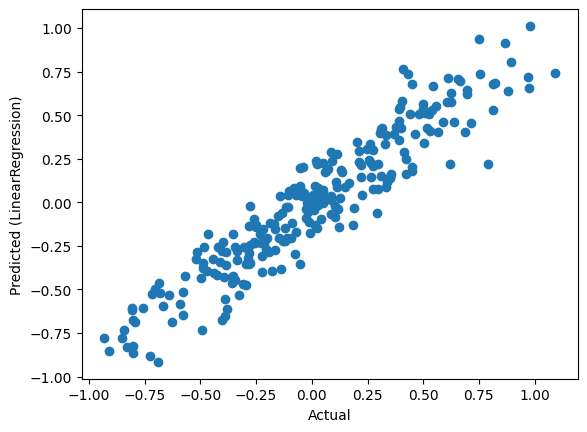

In [112]:
#plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted (LinearRegression)')
plt.show()

In [113]:
# Cross Validation for linear regression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88309762 0.88348164 0.89297965 0.88916002 0.87353985]
Cross Validation Mean Score:  0.8844517571978336


ridge regression on data2

In [114]:
# Split the data into training and testing sets
X = data2[['theta']]
y = data2['theta_double_dot']

Ridge train score: 0.8819708628123037
Ridge test score: 0.8946946451533594
Mean Squared Error: 0.018396359254199992
Model Coefficients: [ 0.         -0.90009777  0.01368137]


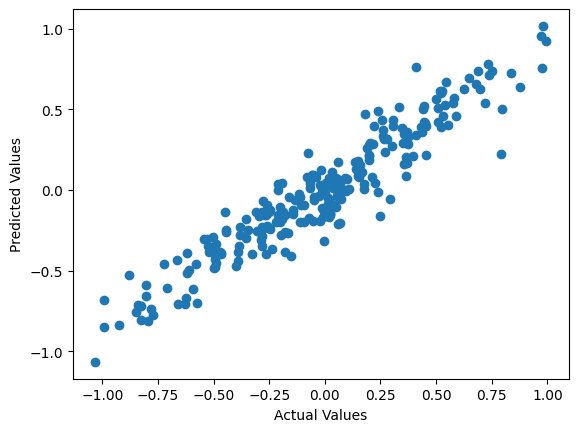

In [115]:


# Define the features and target
X = data2[['theta']]
y = data2['theta_double_dot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# Create a pipeline for Polynomial Regression with Ridge regularization
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))  # You can adjust the regularization strength (alpha) as needed
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
coefficients = model.named_steps['ridge'].coef_

# Print results
print("Ridge train score:", train_score)
print("Ridge test score:", test_score)
print("Mean Squared Error:", mse)
print(f"Model Coefficients: {coefficients}")

# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [116]:
# Cross Validation with ridge regularization
ridge = Ridge(alpha=1)

scores = cross_val_score(ridge, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88282506 0.8834524  0.89297426 0.88955569 0.87330076]
Cross Validation Mean Score:  0.8844216346284585


**Hypothesis 2**: One of theta, sin_theta and theta_double_dot  (i.e. dropping theta and then fitting our equations)

In [117]:
data3=data.copy()

In [118]:
del data3['theta']

data3

,theta_dot,theta_double_dot,sin_theta,theta_dot_sqr
0,-0.069829,0.029322,0.040420,0.004876
1,-0.662335,0.138360,-0.151214,0.438688
2,0.797156,0.446742,-0.551923,0.635458
3,-0.772319,0.016372,-0.150442,0.596477
4,0.188715,-0.298235,0.253667,0.035613
...,...,...,...,...
995,0.367425,0.369823,-0.395446,0.135001
996,-0.137930,-0.048264,0.058259,0.019025
997,0.127600,-0.021672,-0.006571,0.016282
998,0.196108,-0.302841,0.273704,0.038458


Linear regression on data3

In [119]:
X = data3[['theta_dot','sin_theta','theta_dot_sqr']]
y = data3['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [120]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression().fit(X_train, y_train)



y_pred = model.predict(X_test)



In [121]:
print("LinearRegression train score: ", model.score(X_train, y_train))

print("LinearRegression test score: ", model.score(X_test, y_test))

print("LinearRegression Mean Squared Error: ", mean_squared_error(y_test, y_pred))

LinearRegression train score:  0.889018849469519
LinearRegression test score:  0.8728242571135018
LinearRegression Mean Squared Error:  0.02219958949112047


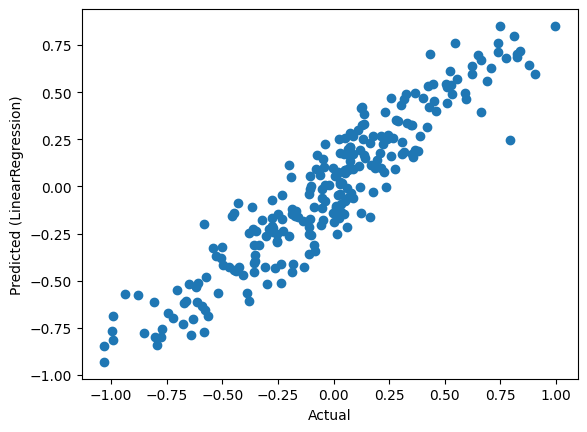

In [122]:
#plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted (LinearRegression)')
plt.show()

In [123]:
# Cross Validation for linear regression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88270351 0.88184992 0.89115117 0.8867362  0.87463658]
Cross Validation Mean Score:  0.8834154765846568


ridge regression on data3

In [124]:
# Split the data into training and testing sets
X = data3[['theta_dot','sin_theta','theta_dot_sqr']]
y = data3['theta_double_dot']

Ridge train score: 0.8823878901132484
Ridge test score: 0.8916809469244515
Mean Squared Error: 0.018922838419323882
Model Coefficients: [ 0.          0.00867674 -0.98080599 -0.01809814 -0.01809814  0.00261597
  0.03000744  0.02101868  0.02804738  0.03853224]


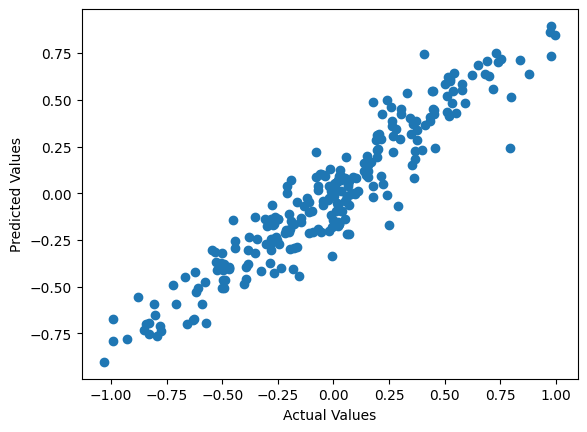

In [125]:


# Define the features and target
X = data3[['theta_dot','sin_theta','theta_dot_sqr']]
y = data3['theta_double_dot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# Create a pipeline for Polynomial Regression with Ridge regularization
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))  # You can adjust the regularization strength (alpha) as needed
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
coefficients = model.named_steps['ridge'].coef_

# Print results
print("Ridge train score:", train_score)
print("Ridge test score:", test_score)
print("Mean Squared Error:", mse)
print(f"Model Coefficients: {coefficients}")

# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [126]:
# Cross Validation with ridge regularization
ridge = Ridge(alpha=1)

scores = cross_val_score(ridge, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88226284 0.8818097  0.89109275 0.88726536 0.87446332]
Cross Validation Mean Score:  0.8833787960128191


**Hypothesis 3**: As for such a small angles sin(theta) can be approximated as theta and there's strong negative correlation(-0.94) between sin(theta) and theta_double_dot, assuming direct correlation between both(i.e. deleting all columns except sin(theta) and theta_double_dot)

In [127]:
data4=data.copy()

In [128]:
del data4['theta_dot']
del data4['theta_dot_sqr']
del data4['theta']
data2

,theta,theta_double_dot
0,0.040431,0.029322
1,-0.151797,0.138360
2,-0.584669,0.446742
3,-0.151016,0.016372
4,0.256469,-0.298235
...,...,...
995,-0.406553,0.369823
996,0.058292,-0.048264
997,-0.006571,-0.021672
998,0.277242,-0.302841


Linear regression on data4

In [129]:
X = data4[['sin_theta']]
y = data4['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [130]:
X = data4[['sin_theta']]
y = data4['theta_double_dot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression().fit(X_train, y_train)



y_pred = model.predict(X_test)



In [131]:
print("LinearRegression train score: ", model.score(X_train, y_train))

print("LinearRegression test score: ", model.score(X_test, y_test))

print("LinearRegression Mean Squared Error: ", mean_squared_error(y_test, y_pred))

LinearRegression train score:  0.882724404299114
LinearRegression test score:  0.8894412417156179
LinearRegression Mean Squared Error:  0.018754914466361065


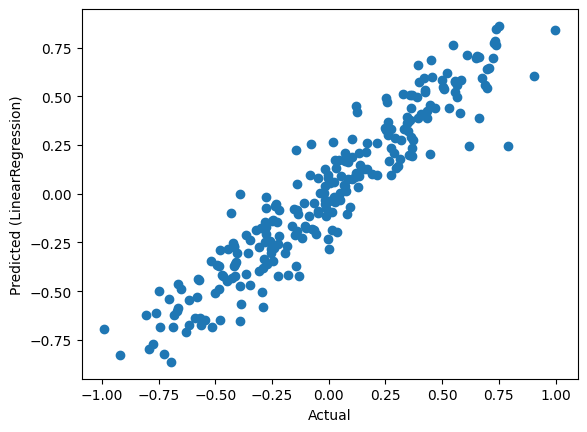

In [132]:
#plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted (LinearRegression)')
plt.show()

In [133]:
# Cross Validation for linear regression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88261802 0.88232344 0.89325309 0.88560166 0.87381487]
Cross Validation Mean Score:  0.8835222164204793


ridge regression on data2

In [134]:
# Split the data into training and testing sets
X = data4[['sin_theta']]
y = data4['theta_double_dot']

Ridge train score: 0.8815066478088021
Ridge test score: 0.8925537083165924
Mean Squared Error: 0.018770371034009976
Model Coefficients: [ 0.         -0.97681041  0.01860376]


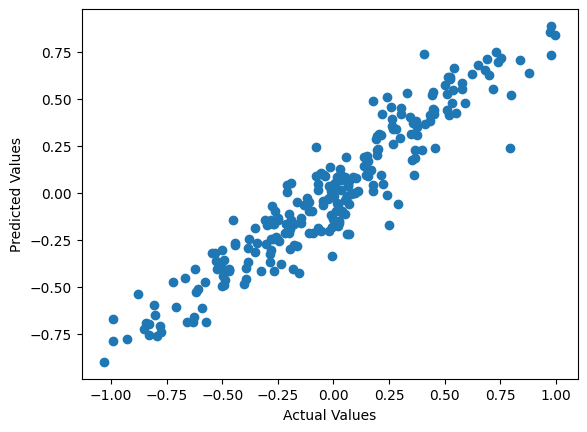

In [135]:


# Define the features and target
X = data4[['sin_theta']]
y = data4['theta_double_dot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# Create a pipeline for Polynomial Regression with Ridge regularization
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))  # You can adjust the regularization strength (alpha) as needed
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
coefficients = model.named_steps['ridge'].coef_

# Print results
print("Ridge train score:", train_score)
print("Ridge test score:", test_score)
print("Mean Squared Error:", mse)
print(f"Model Coefficients: {coefficients}")

# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [136]:
# Cross Validation with ridge regularization
ridge = Ridge(alpha=1)

scores = cross_val_score(ridge, X, y, cv=5)

print("Cross Validation Scores: ", scores)

print("Cross Validation Mean Score: ", scores.mean())

Cross Validation Scores:  [0.88213139 0.88228217 0.8932525  0.88613398 0.87360173]
Cross Validation Mean Score:  0.8834803527772529
